##### Copyright 2020 Lima Vallantin

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Discovering a hidden equation

Article: https://vallant.in/difference-machine-learning-software-development/

Goal: given the formula: 

$$ y = (x * 2) + 3 $$ 

Let's see if we can create a model capable of discovering it.

In [2]:
# import libraries
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create the sets of input and output data
input_data = np.array(range(200), dtype=float)
output_data = [(i * 2) + 3 for i in input_data]
output_data = np.array(output_data, dtype=float)

In [4]:
# create the model
layer_0 = tf.keras.layers.Dense(units=1, input_shape=[1])
# Assemble the layers and get the model
model = tf.keras.Sequential([layer_0])

In [5]:
# Compile model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.01))

In [6]:
# create callback to save the weights of the trained model
checkpoint_path = "../models/day1/day1.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                              monitor='loss',
                                              save_best_only=True,
                                              save_weights_only=True,
                                              verbose=1
                                             )

# train model
history = model.fit(input_data, 
                    output_data, 
                    epochs=150, 
                    verbose=False,
                    callbacks=[callback])

print("Finished training the model")


Epoch 00001: loss improved from inf to 41925.57031, saving model to ../models/day1/day1.ckpt

Epoch 00002: loss improved from 41925.57031 to 38700.35938, saving model to ../models/day1/day1.ckpt

Epoch 00003: loss improved from 38700.35938 to 35610.65625, saving model to ../models/day1/day1.ckpt

Epoch 00004: loss improved from 35610.65625 to 32671.03516, saving model to ../models/day1/day1.ckpt

Epoch 00005: loss improved from 32671.03516 to 29989.72461, saving model to ../models/day1/day1.ckpt

Epoch 00006: loss improved from 29989.72461 to 27300.04297, saving model to ../models/day1/day1.ckpt

Epoch 00007: loss improved from 27300.04297 to 24929.35938, saving model to ../models/day1/day1.ckpt

Epoch 00008: loss improved from 24929.35938 to 22628.08984, saving model to ../models/day1/day1.ckpt

Epoch 00009: loss improved from 22628.08984 to 20547.24805, saving model to ../models/day1/day1.ckpt

Epoch 00010: loss improved from 20547.24805 to 18575.31836, saving model to ../models/day

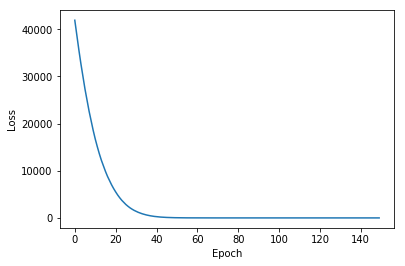

In [7]:
# show statistics
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

In [8]:
# load weights and predict
# use it to load already trained models
checkpoint_path = "../models/day1/day1.ckpt"
model.load_weights(checkpoint_path)

In [9]:
# predict what's the output for the input 300
output_300 = model.predict([300])[0][0]
print('When the input is 300, the model predicts that the output is {:.2f}.'.format(output_300))

When the input is 300, the model predicts that the output is 604.45.


In [10]:
# let's confirm that we are getting a precise output
x = 300
y = (x * 2) + 3
print('Using the true equation, we see that when the input is 300, the output is {:.2f}.'.format(y))

Using the true equation, we see that when the input is 300, the output is 603.00.


In [11]:
# check the weights for this model
layer_0.get_weights()

[array([[2.0086427]], dtype=float32), array([1.8576185], dtype=float32)]